In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv("dataset/loan_data.csv")

In [4]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


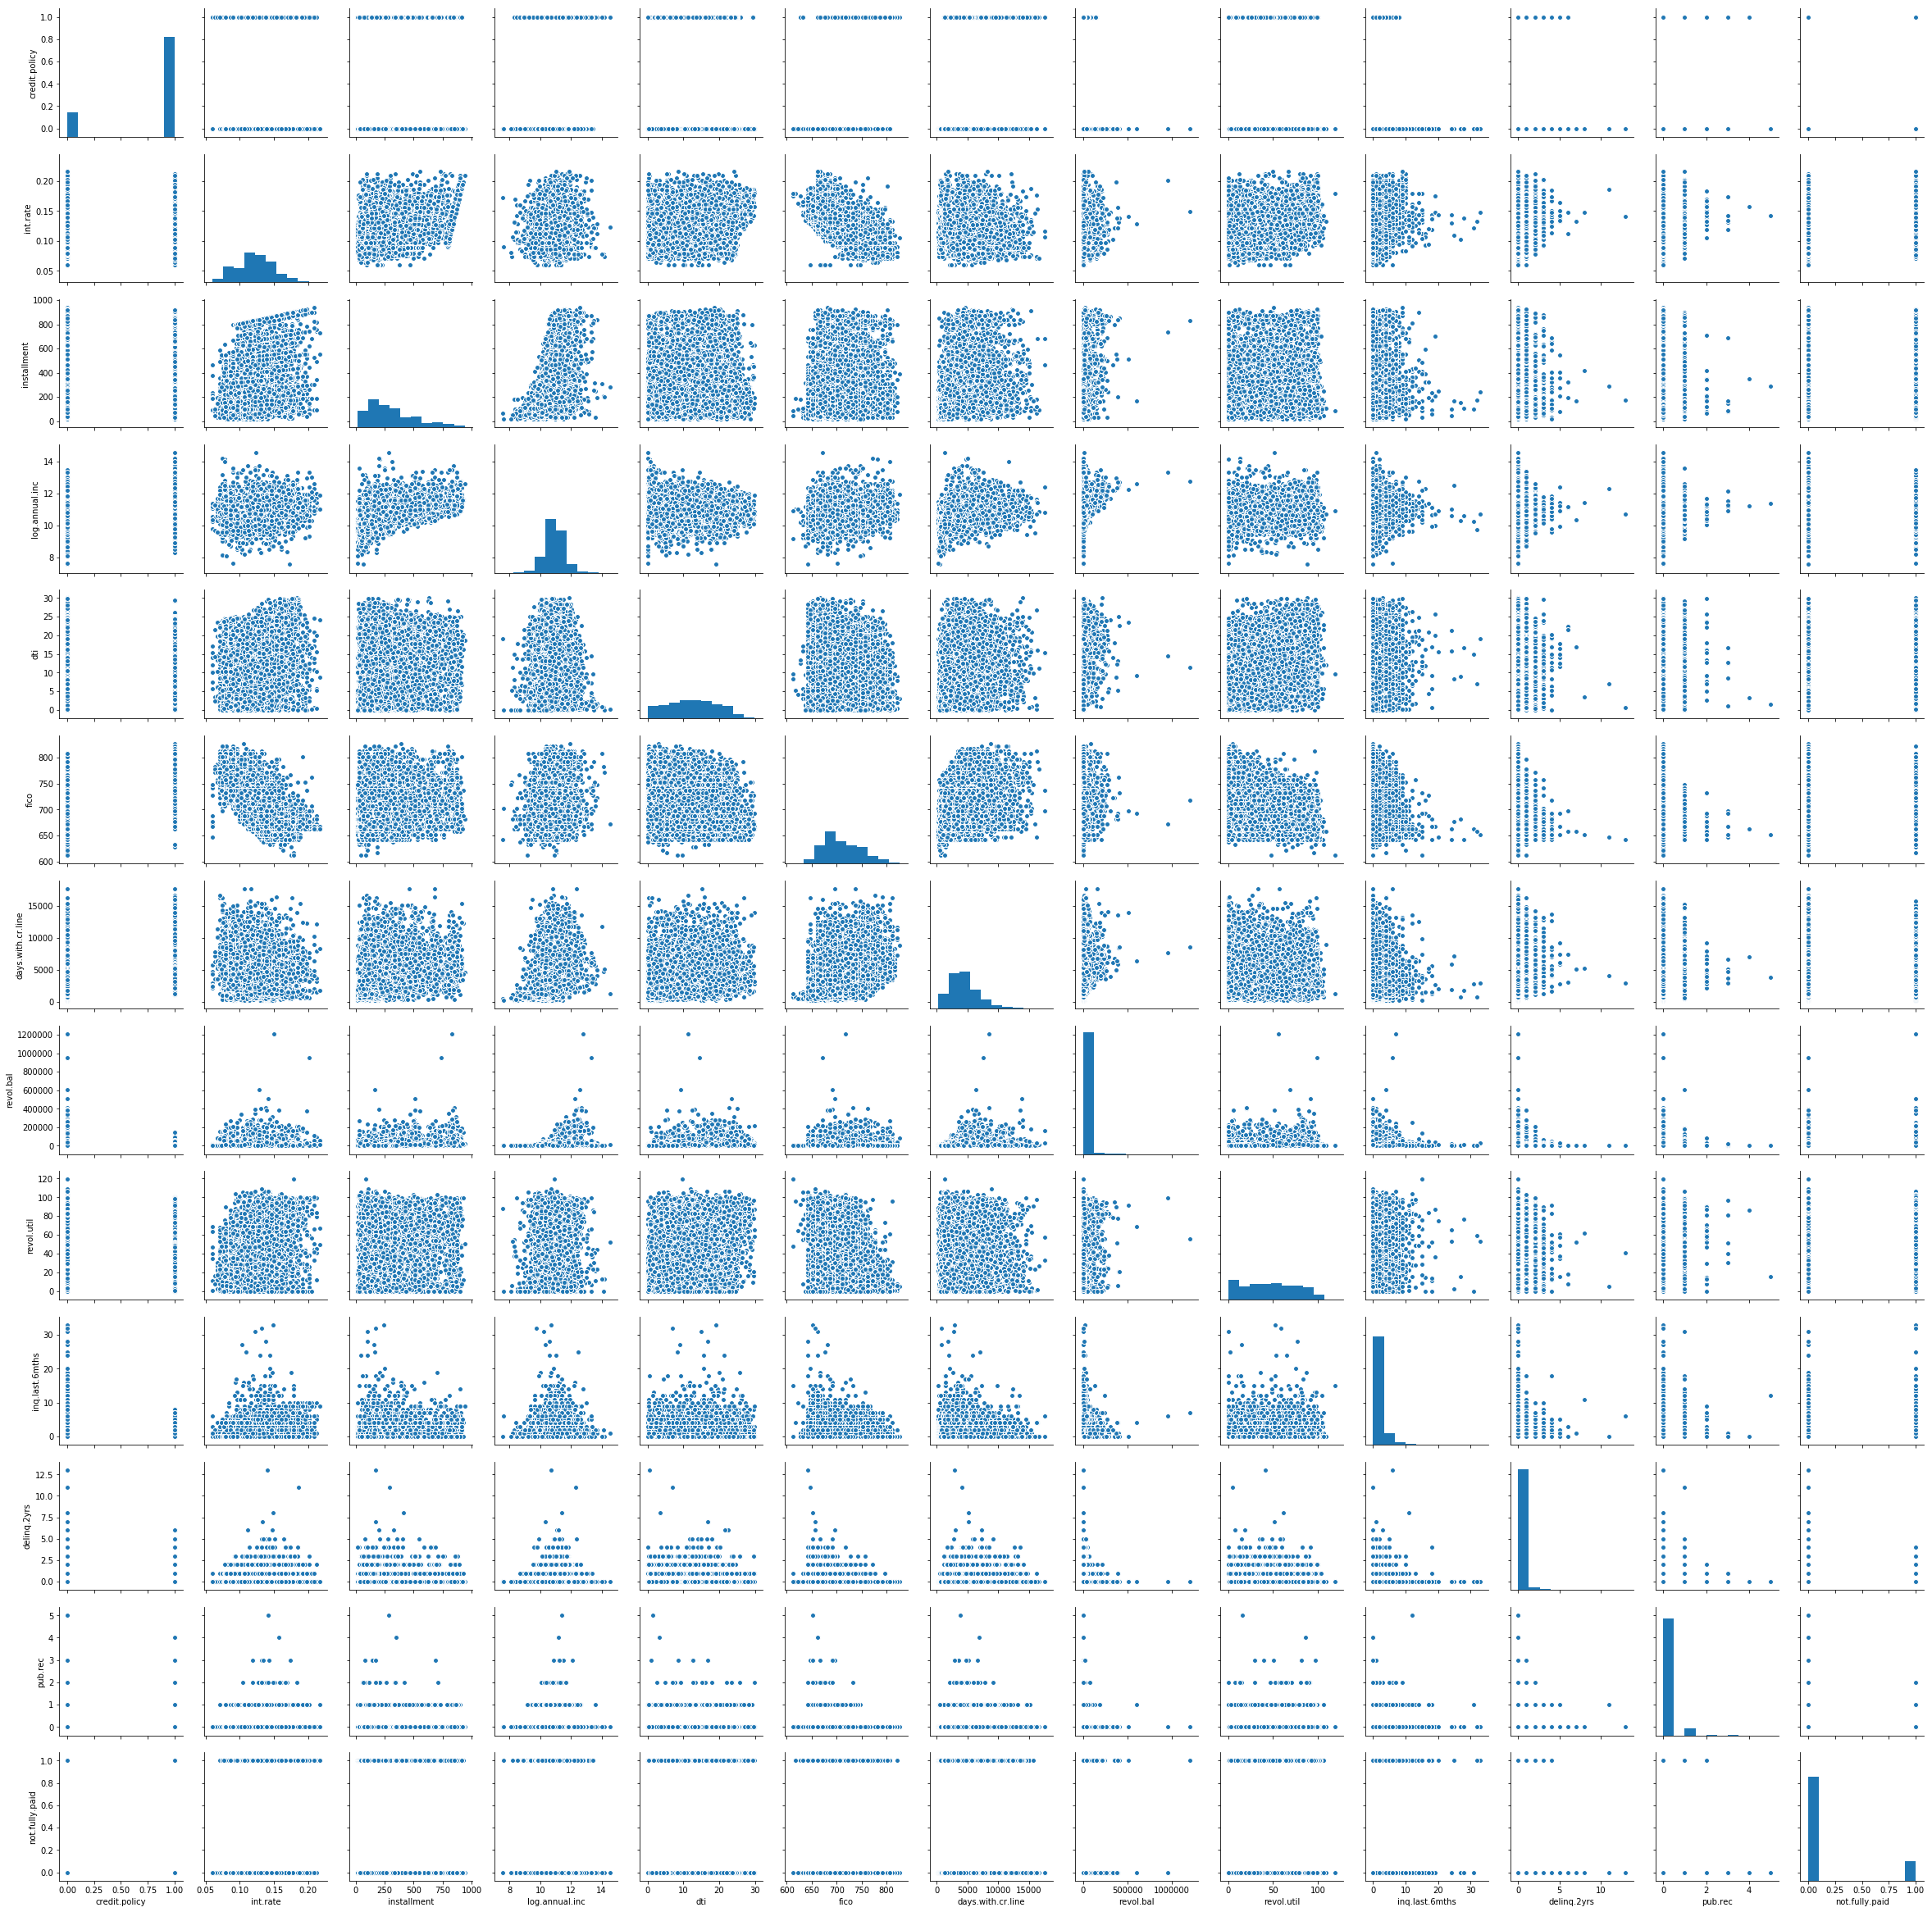

In [6]:
sns.pairplot(dataset)

In [9]:
cat_feats = ['purpose']

In [10]:
dataset = pd.get_dummies(dataset,
                         columns = cat_feats,
                         drop_first = True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [12]:
from sklearn.model_selection import train_test_split

In [19]:
x = dataset.drop('not.fully.paid', axis=1)
y = dataset['not.fully.paid']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
predictions = dtree.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2430
           1       0.21      0.25      0.23       444

   micro avg       0.74      0.74      0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.74      0.75      2874



In [29]:
print(confusion_matrix(y_test, predictions))

[[2021  409]
 [ 333  111]]


# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 600)
rfc.fit(x_train,y_train)
predictions = rfc.predict(x_test)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2430
           1       0.33      0.01      0.02       444

   micro avg       0.84      0.84      0.84      2874
   macro avg       0.59      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874



In [33]:
print(confusion_matrix(y_test,predictions))

[[2420   10]
 [ 439    5]]
